# Transform Template Image in Json format


In [56]:
from scipy import ndimage as ndi
import cv2
import json
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [39]:
img_orig = cv2.imread("synthetical-vs-real-world/1/rw_template.png", cv2.IMREAD_GRAYSCALE)

In [40]:
img[img>0] = 255
obj_labels, total_obj = ndi.label(img)

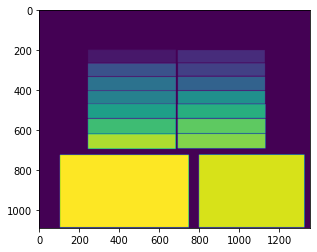

In [30]:
plt.imshow(obj_labels)

In [58]:
json_annotation = {}
height, width = img.shape
json_annotation['orig_height'] = height  
json_annotation['orig_width'] = width
json_annotation['aspect_rate'] = json_annotation['orig_width'] / json_annotation['orig_height']

img_orig = cv2.imread("synthetical-vs-real-world/1/rw_template.png", cv2.IMREAD_GRAYSCALE)
img[img>0] = 255
obj_labels, total_obj = ndi.label(img)
objs_bboxs = ndi.find_objects(obj_labels)
index = 1
for bbox_slice in objs_bboxs:
    if img_orig[bbox_slice].mean() >= 200:
        cls = 'WesternBlot'
    else:
        cls = 'Graphs'
        
    bbox = {}
    bbox['x0'] = bbox_slice[1].start / json_annotation['orig_width']
    bbox['x1'] = bbox_slice[1].stop / json_annotation['orig_width']
    bbox['y0'] = bbox_slice[0].start / json_annotation['orig_height']
    bbox['y1'] = bbox_slice[0].stop /json_annotation['orig_height']
    
    json_annotation[f'{index:03}'] = {'bbox': bbox,
                'class': cls
            }
    index +=1
with open('template.json','w') as wj:
    json.dump(json_annotation,wj)

In [ ]:
for wj in wrong_jsons:
    
    with open(wj,'r') as jf:
        data = json.load(jf)
    
    new_data = {}
    
    new_data['orig_height'] = data['height']    
    new_data['orig_width'] = data['width']
    new_data['aspect_rate'] = new_data['orig_width'] / new_data['orig_height']
    
    for key,value in data.items():
        if  type(value) is dict:
            bbox = value['bbox']
            bbox['x0'] /= new_data['orig_width']
            bbox['x1'] /= new_data['orig_width']
            bbox['y0'] /= new_data['orig_height']
            bbox['y1'] /= new_data['orig_height']
            
            new_data[key] = {'bbox': bbox,
                'class': value['class']
            }
    with open(wj,'w') as wj:
        json.dump(new_data,wj)
